# Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## KDE plots

In [2]:
def plot_kde_circles(n, alpha, r0):
    """
    Plot a 2D KDE of points in a circle with radius r0.
    
    Parameters:
    n (int): Number of points to generate.
    alpha (float): Controls the sharpness of the circle boundary.
    r0 (float): Target radius of the circle.
    """
    # Generate data points
    np.random.seed(42)
    X1 = np.random.normal(0, 1, n)
    X2 = np.random.normal(0, 1, n)
    r2 = X1**2 + X2**2
    p = 1 / (1 + np.exp(-alpha * (r2 - r0)))
    y = np.random.binomial(1, p)
    
    # Subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    colors = ['tab:blue', 'tab:orange']

    for idx, cls in enumerate([0, 1]):
        sns.kdeplot(
            x=X1[y == cls],
            y=X2[y == cls],
            fill=True,
            thresh=0.01,
            levels=100,
            color=colors[idx],
            alpha=0.7,
            ax=axes[idx]
        )
        axes[idx].set_title(f'KDE – Class {cls}')
        axes[idx].set_xlabel("X1")
        axes[idx].set_ylabel("X2")

    plt.suptitle(f"Kernel Density Estimation per class for n={n}, alpha={alpha}", fontsize=16)
    plt.tight_layout()
    plt.show()

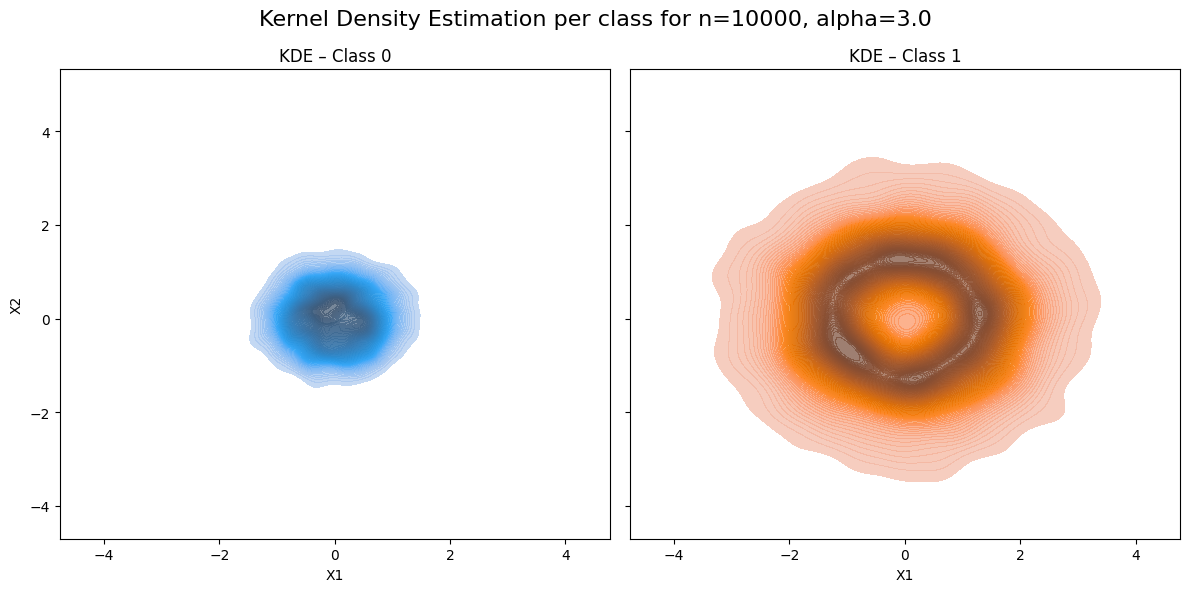

In [22]:
plot_kde_circles(10000, 3.0, 1)

In [3]:
def plot_silhouette_kde_circles(n, alpha, r0):
    """
    Plots the silhouette KDE for two classes with a theoretical circle boundary.
    
    Parameters:
    n (int): Number of samples.
    alpha (float): Controls the sharpness of the circle boundary.
    r0 (float): Target radius for the circle boundary.
    """
    np.random.seed(42)
    X1 = np.random.normal(0, 1, n)
    X2 = np.random.normal(0, 1, n)
    r2 = X1**2 + X2**2
    p = 1 / (1 + np.exp(-alpha * (r2 - r0)))
    y = np.random.binomial(1, p)

    # Plotting the KDE for each class
    plt.figure(figsize=(8, 6))
    colors = ['tab:blue', 'tab:orange']
    handles = []

    for cls, color in zip([0, 1], colors):
        countour = sns.kdeplot(
            x=X1[y == cls],
            y=X2[y == cls],
            fill=False,
            levels=5,
            color=color,
            linewidths=1.5
        )
        handles.append(plt.Line2D([], [], color=color, label=f'Class {cls}'))
    
    # Adding theoretical circle boundary
    theta = np.linspace(0, 2 * np.pi, 300)
    x_circ = np.sqrt(r0) * np.cos(theta)
    y_circ = np.sqrt(r0) * np.sin(theta)
    plt.plot(x_circ, y_circ, 'k--', linewidth=1.5, label='Theoretical Boundary')
    handles.append(plt.Line2D([], [], color='k', linestyle='--', label='Theoretical Boundary'))

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Silhouettes KDE per class for n={n}, alpha={alpha}")
    plt.legend(handles=handles, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

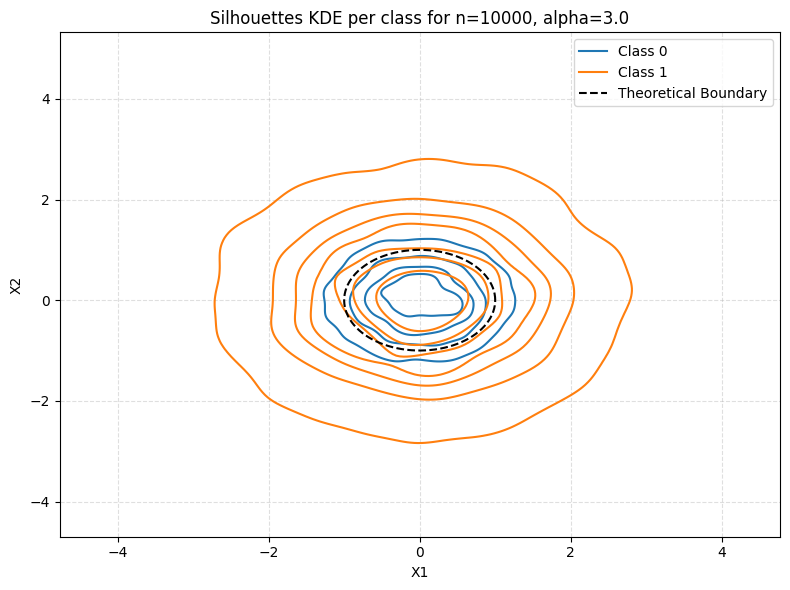

In [20]:
plot_silhouette_kde_circles(10000, 3.0, 1)

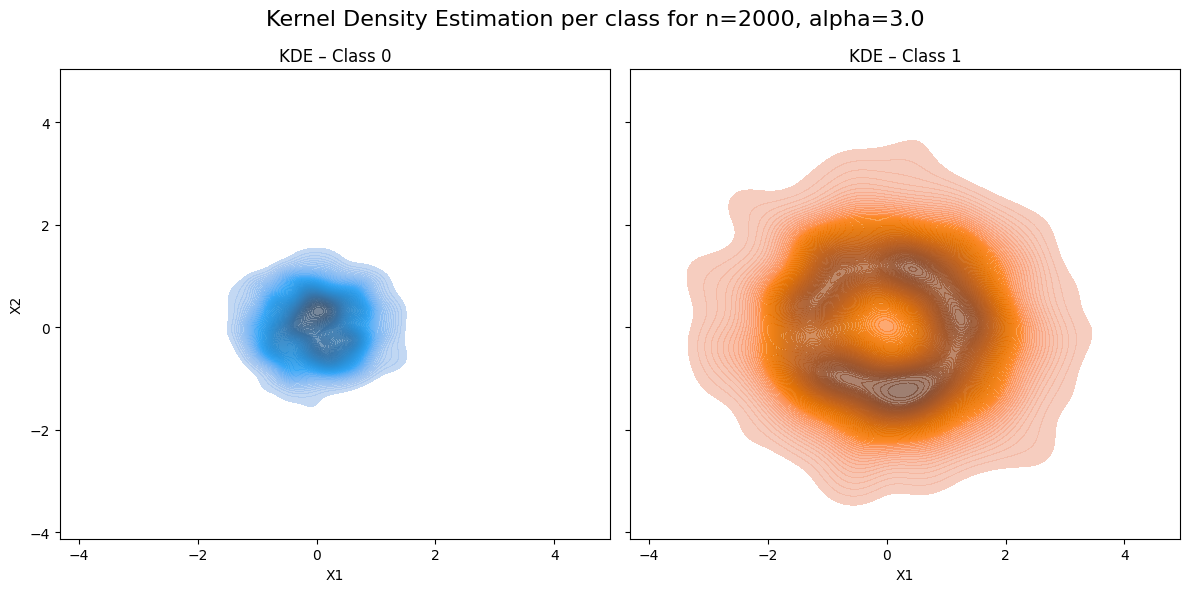

In [9]:
plot_kde_circles(2000, 3.0, 1)

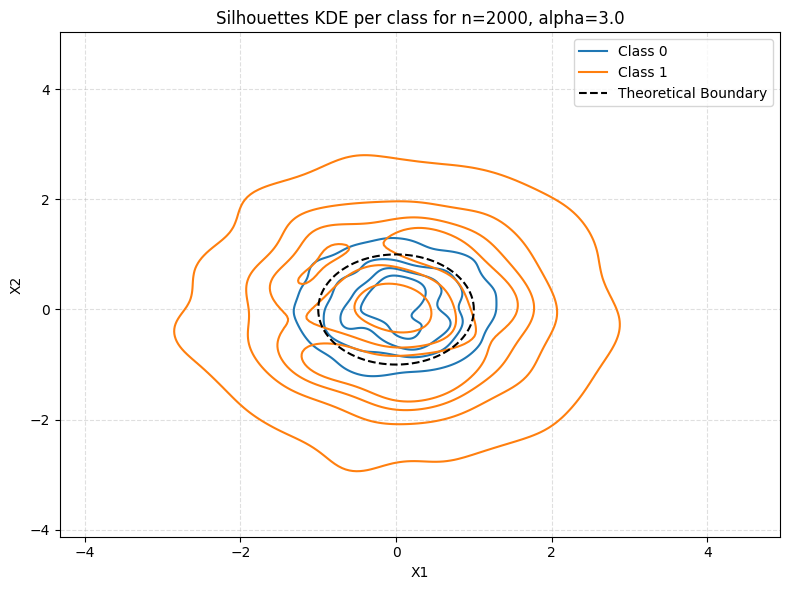

In [10]:
plot_silhouette_kde_circles(2000, 3.0, 1)

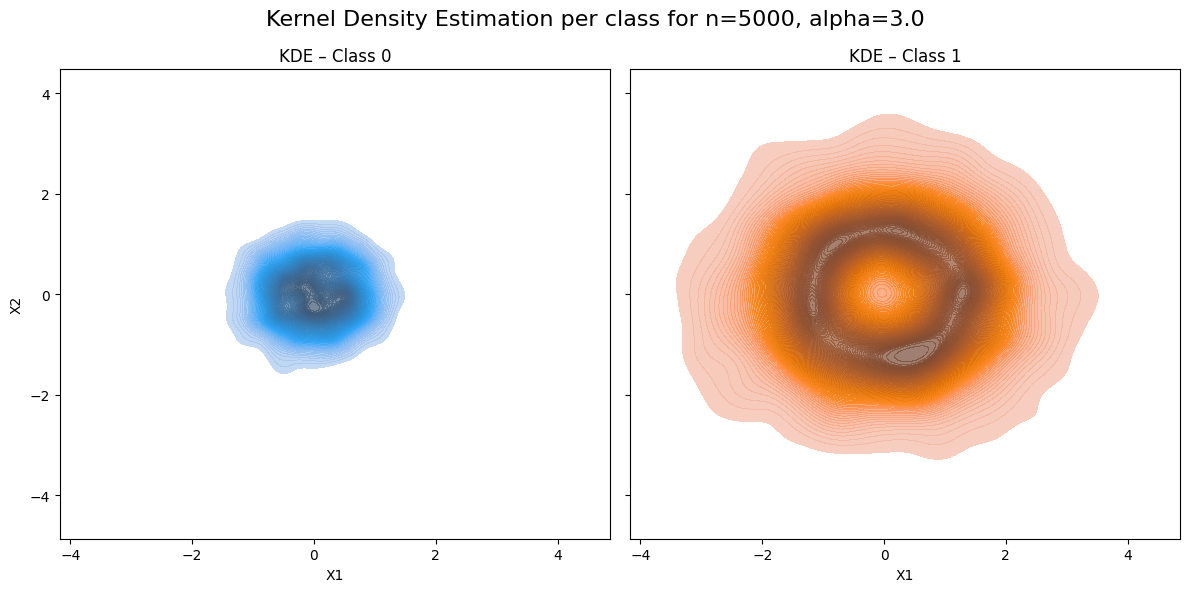

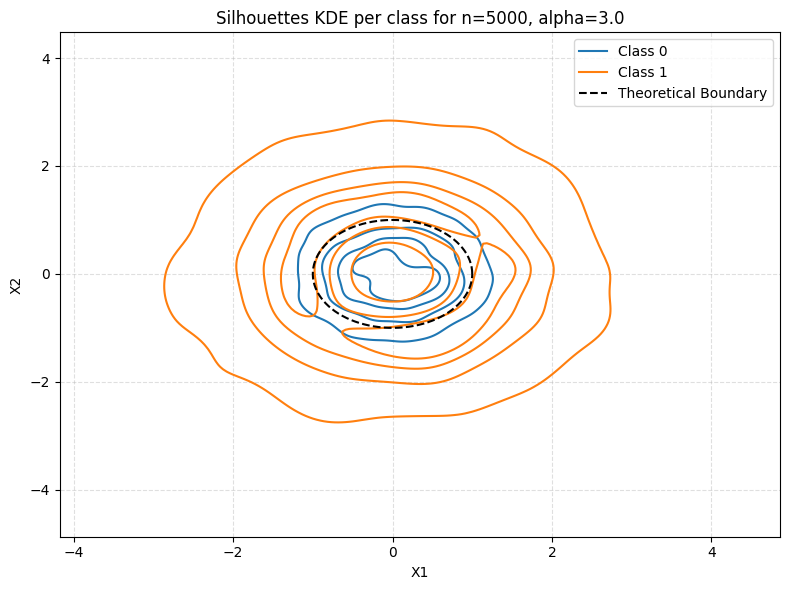

In [25]:
plot_kde_circles(5000, 3.0, 1)
plot_silhouette_kde_circles(5000, 3.0, 1)

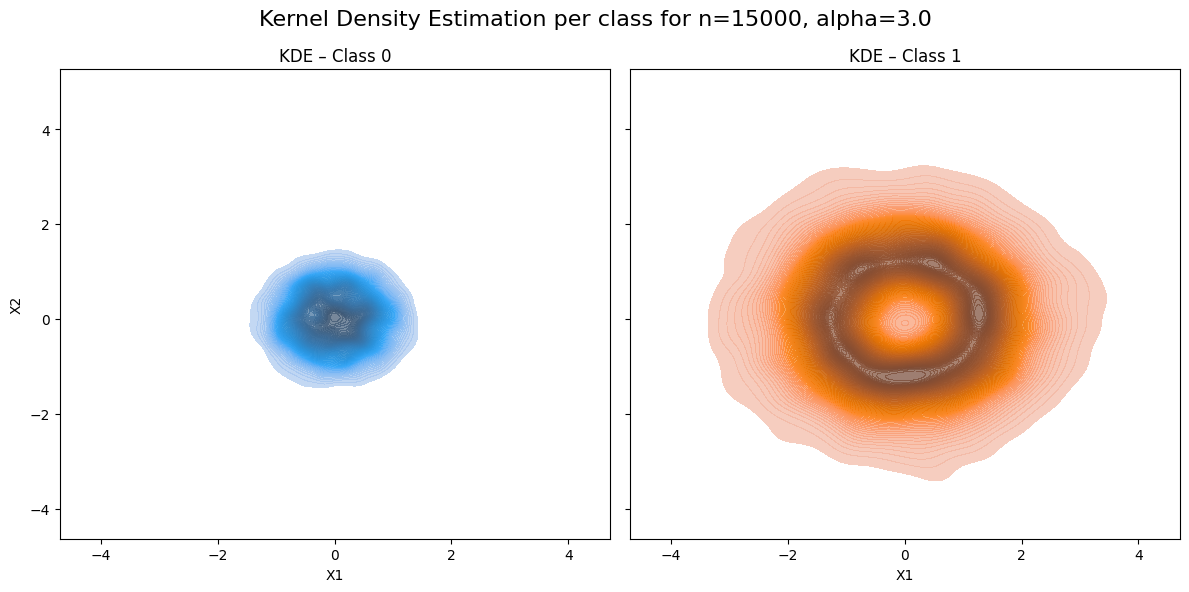

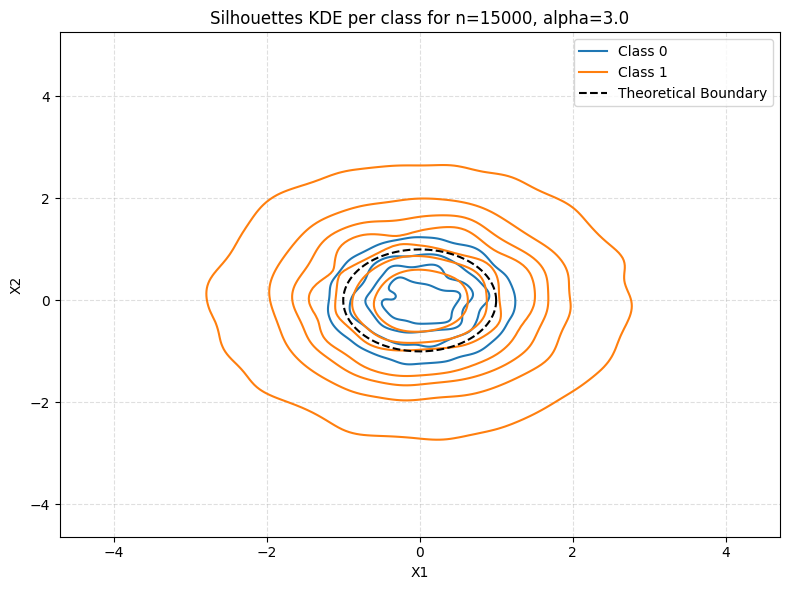

In [4]:
plot_kde_circles(15000, 3.0, 1)
plot_silhouette_kde_circles(15000, 3.0, 1)

## Datasets Visualization

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image
import os
import re

In [11]:
def interactive_image_viewer_multiview(base_path_dict):
    """
    Interactive viewer for images stored in separate folders by view type.
    Scans all folders to build available (n, alpha) values.
    """
    pattern = re.compile(r"plot_n(\d+)_alpha(\d+)\.png")
    available_keys = set()

    # Scan all folders for (n, alpha) keys
    for folder in base_path_dict.values():
        if not os.path.exists(folder):
            continue
        for fname in os.listdir(folder):
            match = pattern.match(fname)
            if match:
                n = int(match.group(1))
                alpha = int(match.group(2))
                available_keys.add((n, alpha))

    if not available_keys:
        print("No images found in any folder.")
        return

    n_values = sorted({n for n, _ in available_keys})
    alpha_values = sorted({a for _, a in available_keys})
    view_types = list(base_path_dict.keys())

    # Widgets
    view_dropdown = widgets.Dropdown(
        options=view_types,
        value=view_types[0],
        description='View:'
    )

    n_slider = widgets.SelectionSlider(
        options=n_values,
        value=n_values[0],
        description='n:',
        continuous_update=False
    )

    alpha_slider = widgets.SelectionSlider(
        options=alpha_values,
        value=alpha_values[0],
        description='alpha:',
        continuous_update=False
    )

    # Display function
    def show_image(view, n, alpha):
        folder = base_path_dict[view]
        filename = f"{folder}/plot_n{n}_alpha{alpha}.png"
        if os.path.exists(filename):
            display(Image(filename=filename))
        else:
            print(f"No image for view={view}, n={n}, alpha={alpha}")

    ui = widgets.VBox([view_dropdown, widgets.HBox([n_slider, alpha_slider])])
    out = widgets.interactive_output(show_image, {
        'view': view_dropdown,
        'n': n_slider,
        'alpha': alpha_slider
    })

    display(ui, out)

In [ ]:
folders = {
    "2D": "images/plot2d",
    "3D": "images/plot3d",
    "KDE": "images/kde",
    "KDE Silhouette": "images/kde_silhouette"
}

interactive_image_viewer_multiview(folders)



Output()

## Original vs Extended

In [4]:
def interactive_model_variant_viewer(base_path="images"):
    """
    Interactive viewer for model variants (Original, Extended) with multiple image types,
    allowing for multi-file variants like prob_0.png, prob_1.png, etc. in 'Extended'.

    Folder structure expected:
    images/n{n}_alpha{a}/{algorithm}/{variant}/{image_type}(_index).png
    """

    # Detect n/alpha folders
    subfolders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    pattern = re.compile(r"n(\d+)_alpha(\d+)")
    available_keys = []

    for folder in subfolders:
        match = pattern.match(folder)
        if match:
            n = int(match.group(1))
            alpha = int(match.group(2))
            available_keys.append((n, alpha))

    n_values = sorted({n for n, _ in available_keys})
    alpha_values = sorted({a for _, a in available_keys})

    # Get algorithm list from a sample folder
    algorithm_options = []
    variant_options = ['Original', 'Extended']
    image_types = ['trees', 'prob', 'decision']

    if available_keys:
        sample_folder = f"n{available_keys[0][0]}_alpha{available_keys[0][1]}"
        algorithm_path = os.path.join(base_path, sample_folder)
        algorithm_options = sorted([d for d in os.listdir(algorithm_path)
                                    if os.path.isdir(os.path.join(algorithm_path, d))])

    # Widgets
    n_slider = widgets.SelectionSlider(
        options=n_values,
        value=n_values[0],
        description='n:',
        continuous_update=False
    )

    alpha_slider = widgets.SelectionSlider(
        options=alpha_values,
        value=alpha_values[0],
        description='alpha:',
        continuous_update=False
    )

    algorithm_dropdown = widgets.Dropdown(
        options=algorithm_options,
        value=algorithm_options[0],
        description='Algorithm:'
    )

    variant_dropdown = widgets.Dropdown(
        options=variant_options,
        value='Original',
        description='Variant:'
    )

    image_type_dropdown = widgets.Dropdown(
        options=image_types,
        value='trees',
        description='Image:'
    )

    def show_image(n, alpha, algorithm, variant, image_type):
        folder = f"{base_path}/n{n}_alpha{alpha}/{algorithm}/{variant}"
        
        # If variant has multiple files like prob_0.png, prob_1.png...
        images_to_display = []
        for fname in os.listdir(folder):
            if fname.startswith(image_type) and fname.endswith(".png"):
                images_to_display.append(os.path.join(folder, fname))

        if not images_to_display:
            print(f"No image found for n={n}, alpha={alpha}, algorithm={algorithm}, variant={variant}, type={image_type}")
        else:
            for path in sorted(images_to_display):
                display(Image(filename=path))

    # Layout
    ui = widgets.VBox([
        widgets.HBox([n_slider, alpha_slider]),
        widgets.HBox([algorithm_dropdown, variant_dropdown, image_type_dropdown])
    ])

    out = widgets.interactive_output(show_image, {
        'n': n_slider,
        'alpha': alpha_slider,
        'algorithm': algorithm_dropdown,
        'variant': variant_dropdown,
        'image_type': image_type_dropdown
    })

    display(ui, out)


In [5]:
interactive_model_variant_viewer("images")

Output()

## Calibration Visualization

In [6]:
def interactive_calibration_image_viewer(base_path="images"):
    """
    Interactive viewer for algorithm image outputs (logitboost, c45, lmt1, lmt2)
    organized by (n, alpha) combinations.

    Expected folder structure:
    images/
    ├── n1000_alpha3/
    │   ├── logitboost/
    │   │   ├── calibration.png
    │   │   ├── scatter.png
    │   │   └── true.png
    ...

    Parameters
    ----------
    base_path : str
        Root folder containing subfolders of the form 'n{value}_alpha{value}'.
    """

    # Detect folders like n1000_alpha3
    subfolders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    pattern = re.compile(r"n(\d+)_alpha(\d+)")
    available_keys = []

    for folder in subfolders:
        match = pattern.match(folder)
        if match:
            n = int(match.group(1))
            alpha = int(match.group(2))
            available_keys.append((n, alpha))

    # Extract unique n and alpha values
    n_values = sorted({n for n, _ in available_keys})
    alpha_values = sorted({a for _, a in available_keys})

    algorithm_options = []
    # Detect algorithm folders from a sample (n, alpha) folder
    if available_keys:
        sample_folder = f"n{available_keys[0][0]}_alpha{available_keys[0][1]}"
        algorithm_path = os.path.join(base_path, sample_folder)
        algorithm_options = sorted([d for d in os.listdir(algorithm_path) if os.path.isdir(os.path.join(algorithm_path, d))])

    image_types = ['calibration', 'scatter', 'true']

    # Widgets
    n_slider = widgets.SelectionSlider(
        options=n_values,
        value=n_values[0],
        description='n:',
        continuous_update=False
    )

    alpha_slider = widgets.SelectionSlider(
        options=alpha_values,
        value=alpha_values[0],
        description='alpha:',
        continuous_update=False
    )

    algorithm_dropdown = widgets.Dropdown(
        options=algorithm_options,
        value=algorithm_options[0],
        description='Algorithm:'
    )

    image_type_dropdown = widgets.Dropdown(
        options=image_types,
        value='calibration',
        description='Image:'
    )

    def show_image(n, alpha, algorithm, image_type):
        folder = f"{base_path}/n{n}_alpha{alpha}/{algorithm}"
        filename = os.path.join(folder, f"{image_type}.png")
        if os.path.exists(filename):
            display(Image(filename=filename))
        else:
            print(f"No image found for n={n}, alpha={alpha}, algorithm={algorithm}, image={image_type}")

    # Combine widgets into layout
    ui = widgets.VBox([
        widgets.HBox([n_slider, alpha_slider]),
        widgets.HBox([algorithm_dropdown, image_type_dropdown])
    ])

    out = widgets.interactive_output(show_image, {
        'n': n_slider,
        'alpha': alpha_slider,
        'algorithm': algorithm_dropdown,
        'image_type': image_type_dropdown
    })

    display(ui, out)


In [7]:
interactive_calibration_image_viewer("images")

Output()